# The Sparks Foundation -  Data Science & Business Analytics Internship


GRIP : The Sparks Foundation 

Author : Nour Ben Brahim

Task 1 : Prediction Using Supervised Machine Learning 

In this task we have to predict the percentage score of a student based on the number of hours studied.The task has two variables where the feature is the number of hours studied and the target value is the percentage score.This can be solved using simple linear regression.


# Step 1 : Importing the dataset


In [4]:
# Importing all required libraries in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
# Checking if the dataset contains null or missings values 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 2 : Visualizing the dataset

In this step we will plot the dataset to check whatever we can observe any relation between the two variables or not 

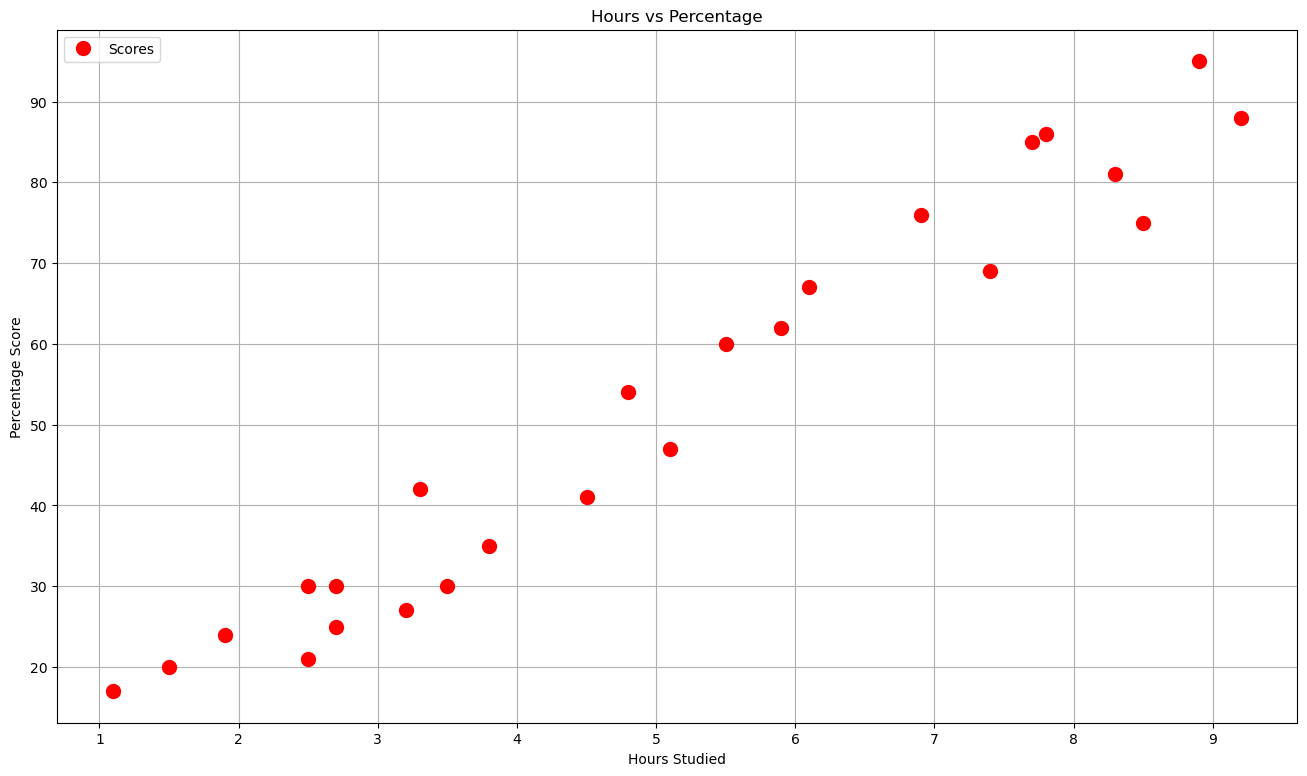

In [26]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o' , color='red', markersize=10)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

Conclusion: The graph above shows a linear relationship between "Hours studied " and the "percentage score."So we can use the linear regression supervised machine model on it to predict different values.

In [27]:
#  We can also use the .corr to determine the correlation between  the variables 
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Step 3 : Data preparation 


In this step, we will divide the data into " features" (Inputs) and "labels"(Outputs). Then the dataset will be divided into two parts 

1.Testing data


2.Training data

In [29]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
# Using ifloc function to divide the dataset 
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values 

In [35]:
# We will try to print X
X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [36]:
# We will try to print the Y
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [38]:
# Splitting data into training and testing data 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Step 4 : Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm(Model).

In [39]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# Step 5 : Visualizing the model 

In this step, we visualize the model.

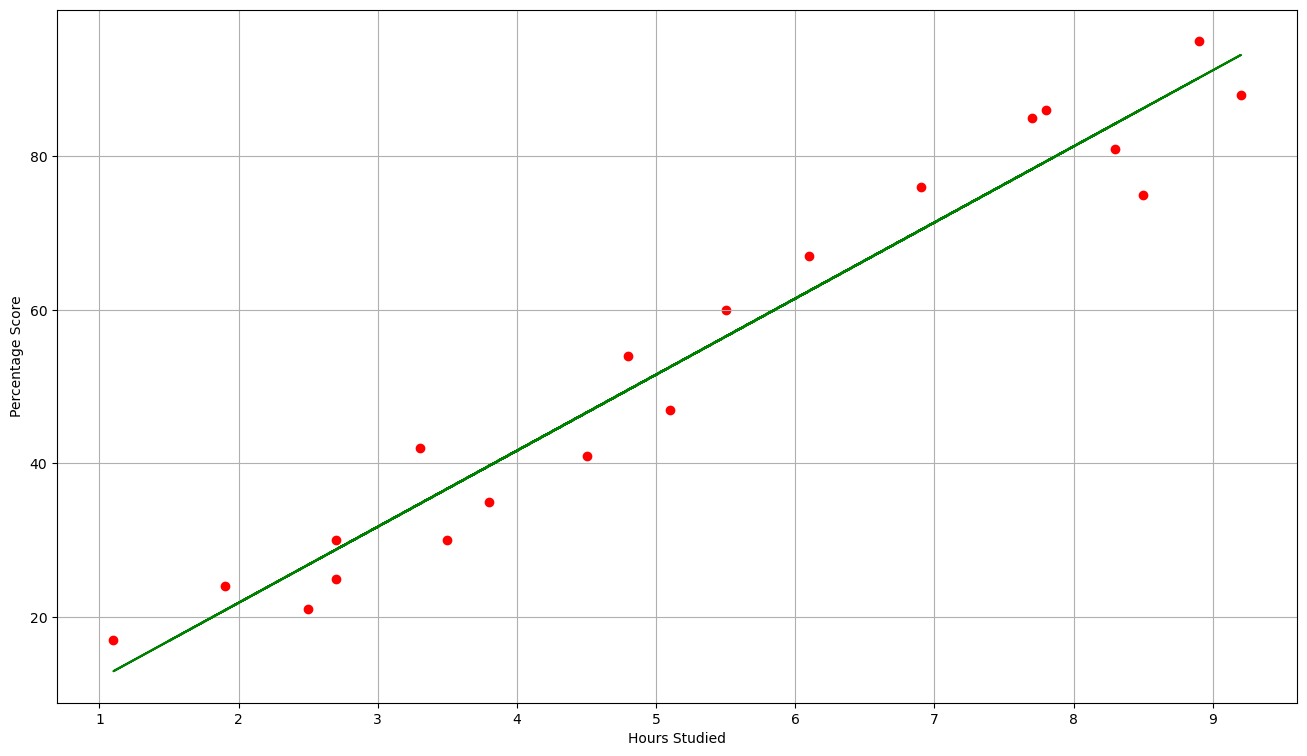

In [47]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(X_train, y_train , color="red")
plt.plot(X, line , color="green" );
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

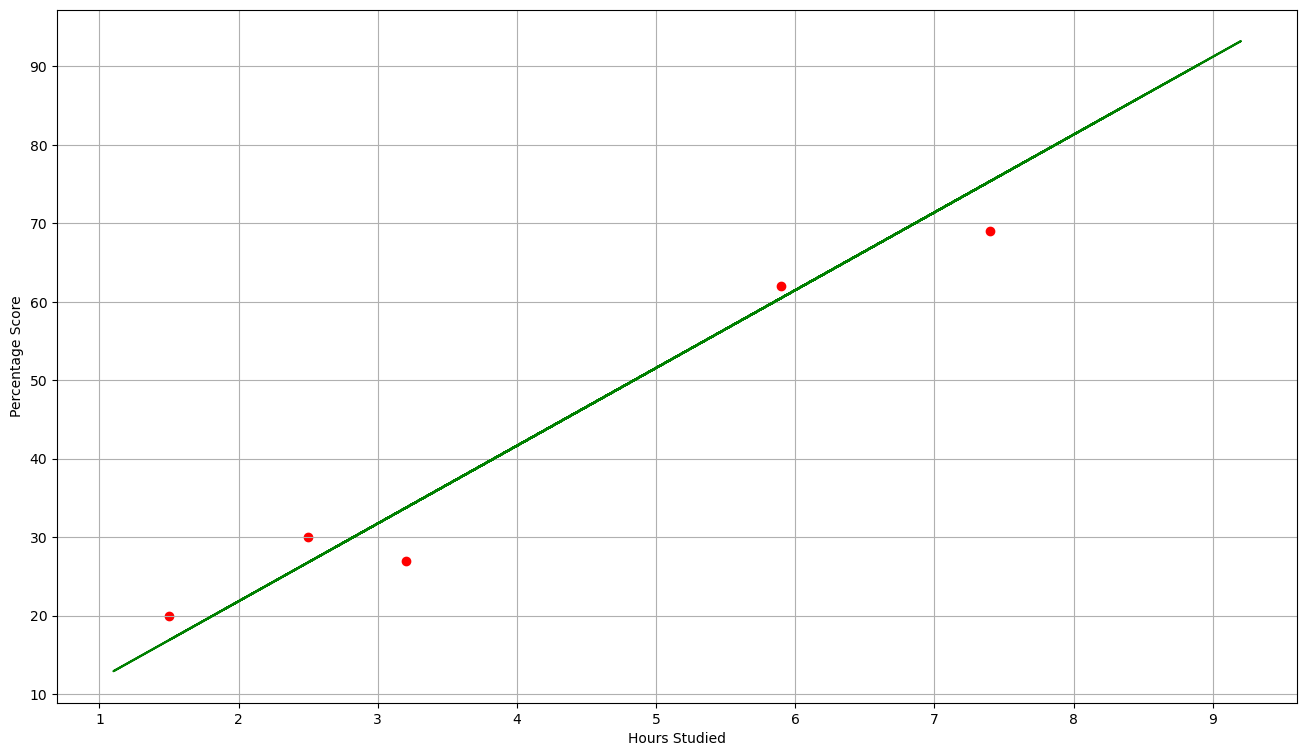

In [48]:

# Plotting for the testing data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(X_test, y_test , color="red")
plt.plot(X, line , color="green" );
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

# Step 6  : Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [50]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [51]:
# Comparing Actual vs Predicted
Comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [53]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("The Predicted Score if a person studies for",hours,"hours is",own_pred[0])

The Predicted Score if a person studies for 9.25 hours is 93.69173248737538


Conclusion: if a person studies for 9.25 hours/ day, the predicted score will be 93.69173248737538

# Step 7 : Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
